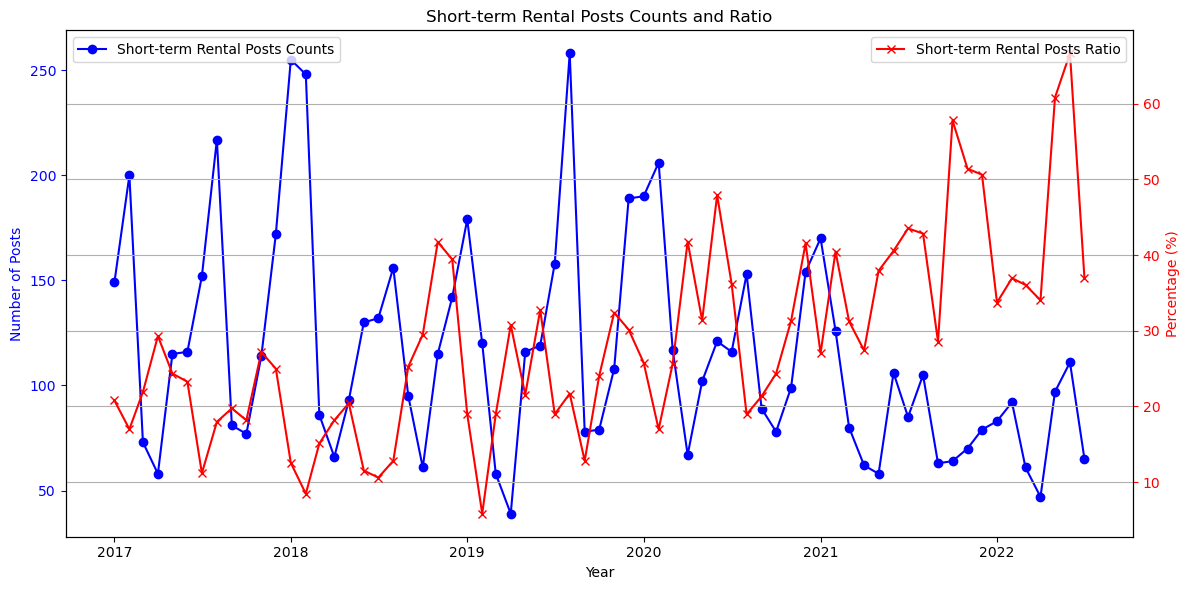

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
snulife_df = pd.read_excel('Snulife.xlsx')
everytime_df = pd.read_excel('Everytime.xlsx')

# 두 데이터프레임 합치기
df = pd.concat([snulife_df, everytime_df], ignore_index=True)

# 'Date' 칼럼을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 월별 데이터 개수
monthly_counts = df.groupby(df['Date'].dt.to_period("M")).size()

# 'Title' 및 'Content'에서 "단기" 또는 "양도"가 포함된 행을 필터링
keyword_df = df[df['Title'].str.contains('단기|양도', na=False) | df['Content'].str.contains('단기|양도', na=False)]
keyword_counts = keyword_df.groupby(keyword_df['Date'].dt.to_period("M")).size()

# keyword_ratio 계산: keyword_counts를 monthly_counts로 나눈 후, 100을 곱함
keyword_ratio = (keyword_counts / monthly_counts) * 100

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# ax1에 monthly_counts를 그림
ax1.plot(monthly_counts.index.to_timestamp(), monthly_counts.values, 'o-', label='Short-term Rental Posts Counts', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Posts', color='blue')
ax1.tick_params('y', colors='blue')
ax1.legend(loc='upper left')

# ax2는 ax1과 x축을 공유하면서 y축만 다름
ax2 = ax1.twinx()
ax2.plot(keyword_ratio.index.to_timestamp(), keyword_ratio.values, 'x-', label='Short-term Rental Posts Ratio', color='red')
ax2.set_ylabel('Percentage (%)', color='red')
ax2.tick_params('y', colors='red')
ax2.legend(loc='upper right')

plt.title('Short-term Rental Posts Counts and Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

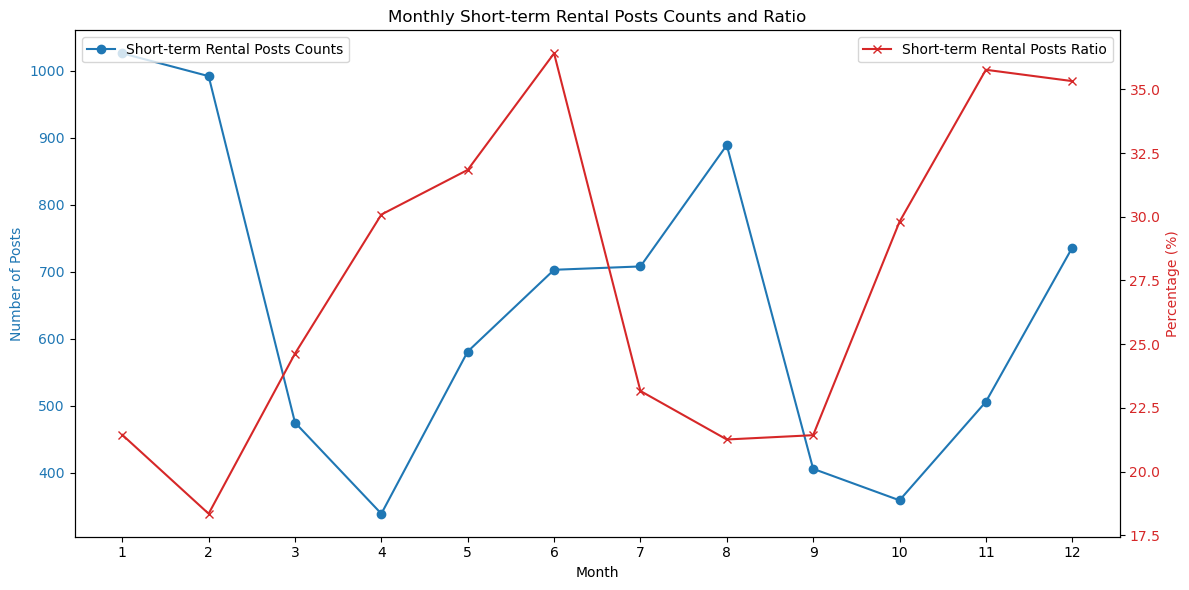

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
snulife_df = pd.read_excel('Snulife.xlsx')
everytime_df = pd.read_excel('Everytime.xlsx')

# 두 데이터프레임 합치기
df = pd.concat([snulife_df, everytime_df], ignore_index=True)

# 'Date' 칼럼을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# 월별 데이터 개수
monthly_counts = df.groupby('Month').size()

# 'Title' 및 'Content'에서 "단기" 또는 "양도"가 포함된 행을 필터링
keyword_df = df[df['Title'].str.contains('단기|양도', na=False) | df['Content'].str.contains('단기|양도', na=False)]
keyword_counts = keyword_df.groupby('Month').size()

# 월별 keyword 비율 계산
keyword_ratio = (keyword_counts / monthly_counts) * 100

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels([f"{i}" for i in range(1, 13)])
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Posts', color=color)
ax1.plot(monthly_counts.index, monthly_counts.values, 'o-', label='Short-term Rental Posts Counts', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage (%)', color=color)
ax2.plot(keyword_ratio.index, keyword_ratio.values, 'x-', label='Short-term Rental Posts Ratio', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Monthly Short-term Rental Posts Counts and Ratio')
plt.tight_layout()
plt.show()

In [27]:
total_keyword_counts = keyword_counts.sum()
print(f'"단기" 또는 "양도"가 포함된 글의 총 개수: {total_keyword_counts}')

"단기" 또는 "양도"가 포함된 글의 총 개수: 2050
